# **Load Files from Drive** - 
1. XML files
2. Car Video
3. Car Image with number plate

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
os.system('mkdir /content/sample_data/Russian_Number_Plate')

256

In [3]:
! unzip  -u '/content/gdrive/MyDrive/DL_MCT_Data.zip' -d '/content/sample_data/Russian_Number_Plate'

Archive:  /content/gdrive/MyDrive/DL_MCT_Data.zip
mapname:  conversion of  failed


In [4]:
! cp '/content/gdrive/MyDrive/Car_video.avi' '/content/sample_data/Russian_Number_Plate'
! cp '/content/gdrive/MyDrive/Russian_Number_Plate.jpg' '/content/sample_data/Russian_Number_Plate'

# **Reading Image and detecting Number Plates**

In [5]:
import cv2

**Load Image**

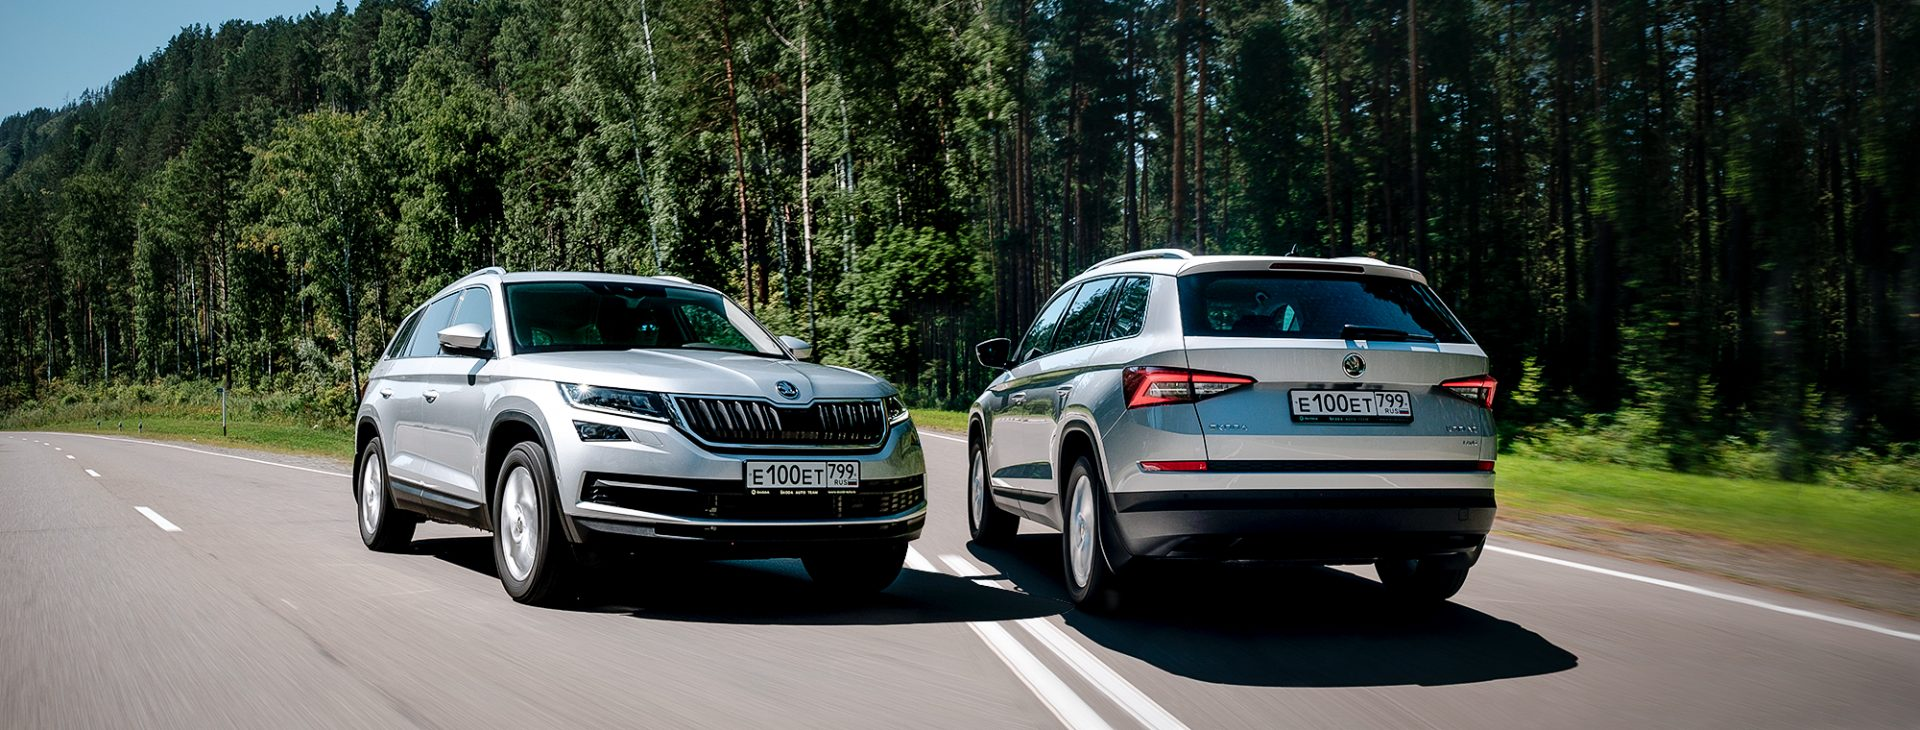

In [6]:
from google.colab.patches import cv2_imshow

car_image = cv2.imread('/content/sample_data/Russian_Number_Plate/Russian_Number_Plate.jpg')
cv2_imshow(car_image)

**Pre-process Image**

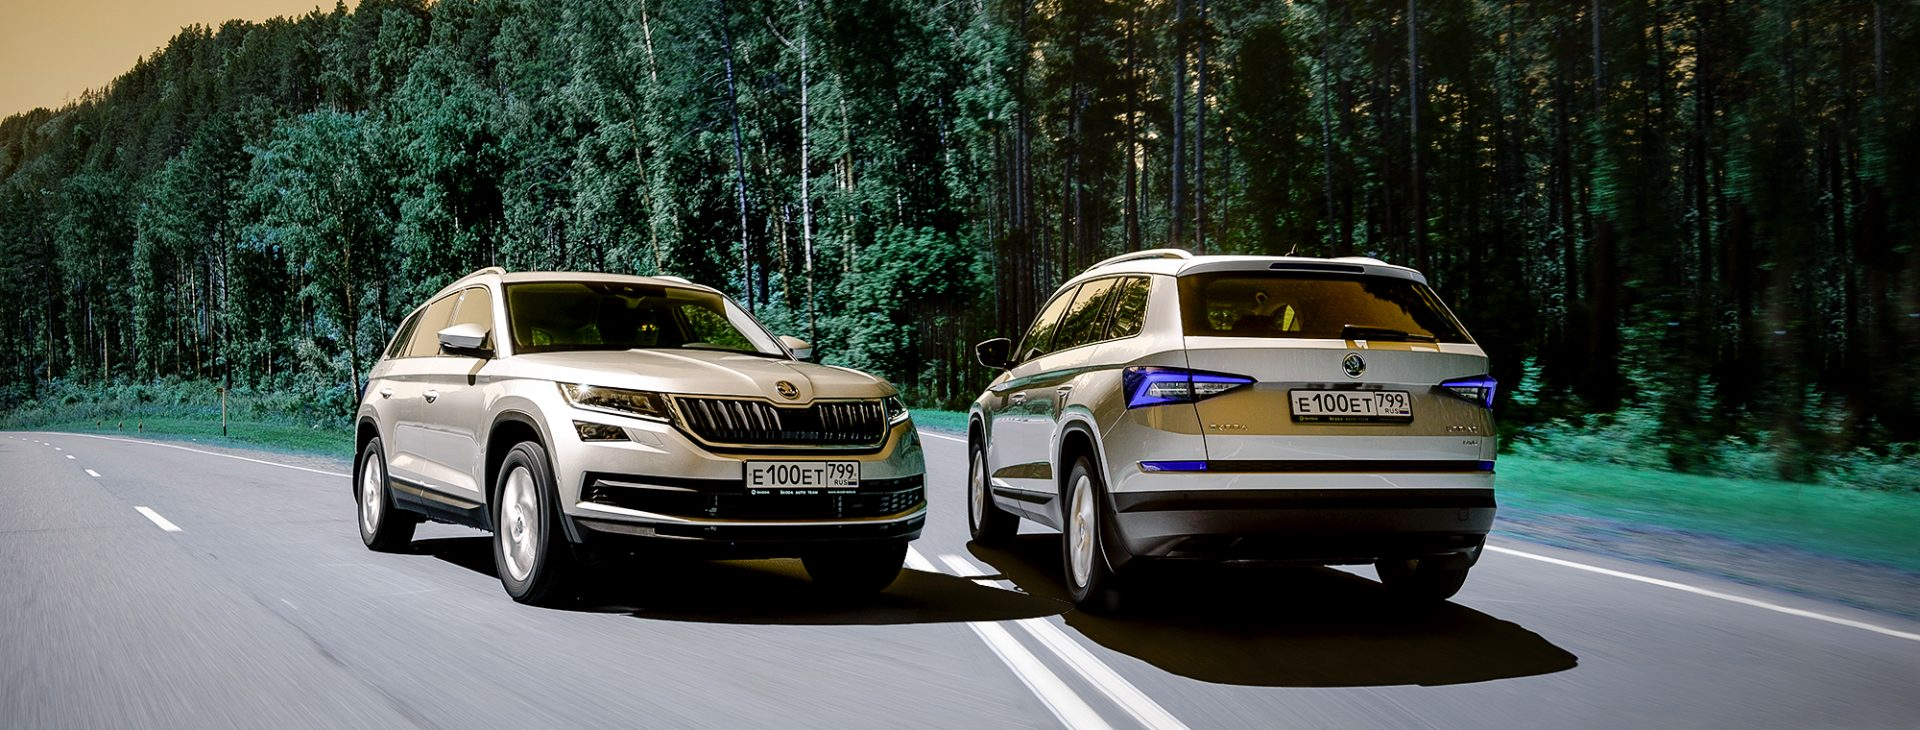

In [7]:
converted_image = cv2.cvtColor(car_image,cv2.COLOR_BGR2RGB)
cv2_imshow(converted_image)

**Load haarcascade_russian_plate_number.xml**

In [8]:
number_plate_classifier = cv2.CascadeClassifier('/content/sample_data/Russian_Number_Plate/haarcascade_russian_plate_number.xml')

**Pass Image to Classifier and detect number plates**

In [9]:
plates = number_plate_classifier.detectMultiScale(car_image)

**Highlight the number plates**

In [10]:
for plate in plates:
    x, y, width, height = plate
    with_indicators = cv2.rectangle(car_image, (x, y), 
                                    (x + width, y + height), 
                                    (0, 255, 0), 5)

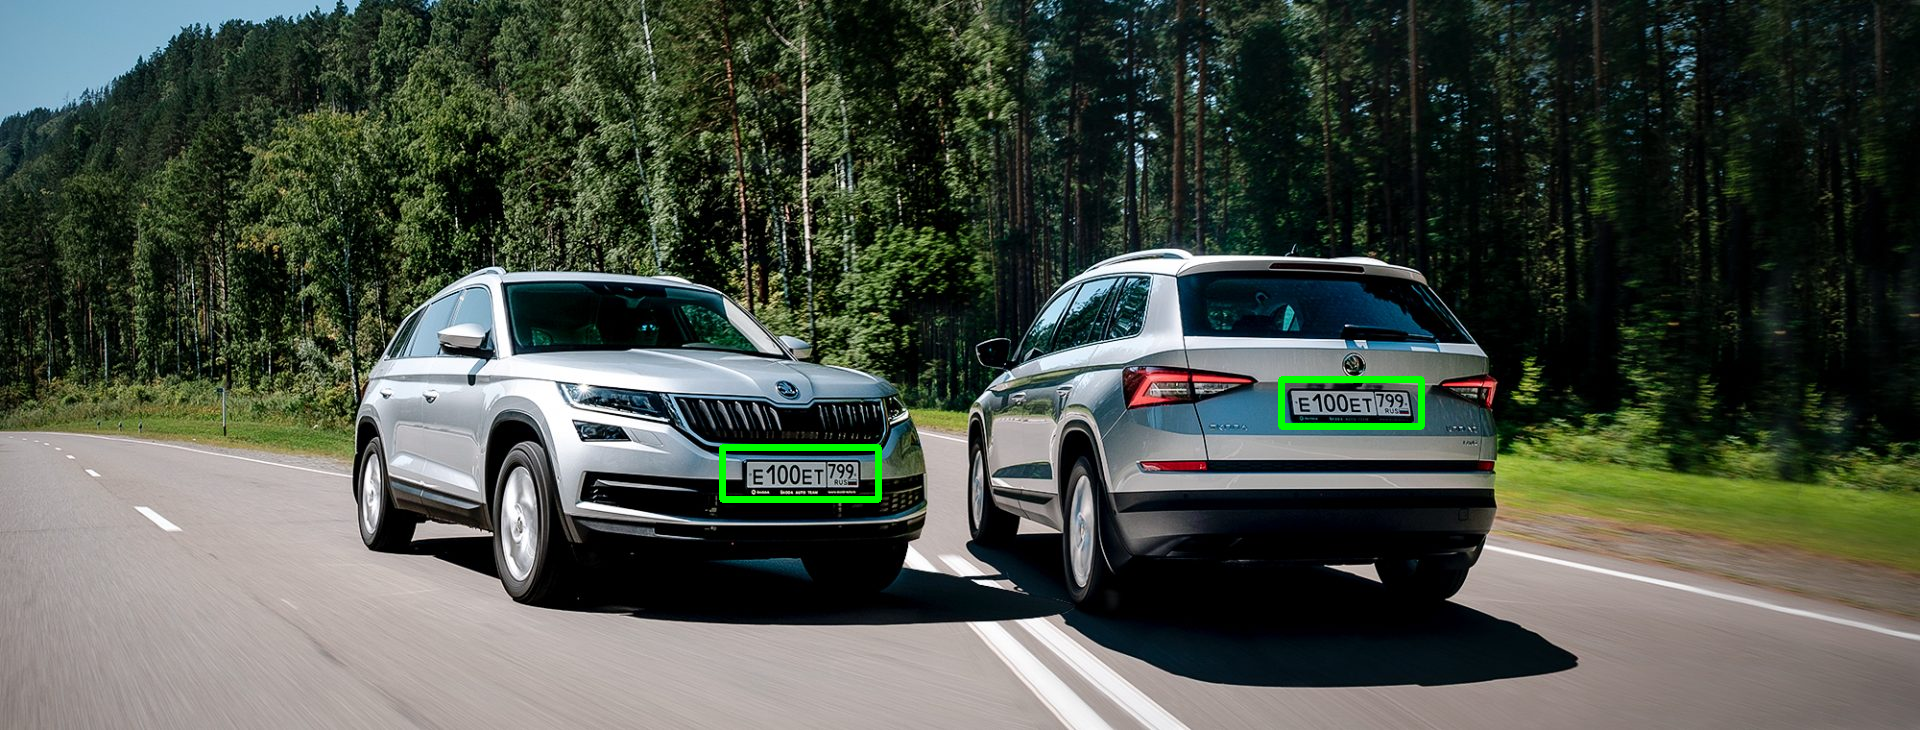

In [11]:
cv2_imshow(with_indicators)